In [5]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
%matplotlib inline
from googletrans import Translator
import time
import emoji
from tqdm import tqdm_notebook

In [6]:
df = pd.read_csv('../output/india.csv', encoding='utf-8')

In [7]:
# use google translator
# translator=Translator()
translator = Translator(service_urls=[
      'translate.google.com',
      'translate.google.co.kr',
    ])
trans_text=dict()

In [10]:
def trans(error_index=None):
    if error_index: 
        new_error_index=[]
        for idx in tqdm_notebook(error_index):
            text=emoji.demojize(df.text[idx])
            try:
                trans = translator.translate(text,dest='en',src='auto')
                trans_text[idx]=trans.text
            except:
                new_error_index.append(idx)
    
    else:
        new_error_index=[]
        for i in tqdm_notebook(range(len(df.text))):
            text = emoji.demojize(df.text[i])
            try:
                trans=translator.translate(text,dest='en',src='auto')
                trans_text[i]=trans.text
            except:
                new_error_index.append(i)
        
    return new_error_index

In [11]:
err= trans()
len(err)

HBox(children=(IntProgress(value=0, max=1945), HTML(value='')))

In [20]:
err =trans(err)
print("err {} , trans_text {} df {} ".format(len(err),len(trans_text),len(df)))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))


err 1 , trans_text 1944 df 1945 


In [67]:
text=emoji.demojize(df.text[err[0]])

In [69]:
text.replace("\U0001f970",'')

'Others: Hugs and Kisses :smiling_face_with_heart-eyes:\r\r\nMe: Bugs and Fixes :sad_but_relieved_face::sad_but_relieved_face:\r\r\n\r\r\nWorking on the final project (Inventory App Stage 2).\r\r\n#GoogleUdacityIndiaScholars \r\r\n#100DaysOfCode \r\r\n@akshtjn \r\r\n@UdacityINDIA \r\r\n@udacity \r\r\n@Google \r\r\n@GoogleIndia https://t.co/KtkHp82exK'

In [71]:
trans = translator.translate(text.replace("\U0001f970",''),dest='en',src='auto')

In [72]:
trans_text[err[0]]=trans

In [73]:
print("err {} , trans_text {} df {} ".format(len(err),len(trans_text),len(df)))

err 1 , trans_text 1945 df 1945 


In [74]:
list_trans=[trans_text[i] for i in range(len(df)) ]

In [75]:
df["trans_text"]=list_trans

In [77]:
df_english=df
# df_english.head(10)

In [78]:
sentences = list(df_english['trans_text'])

In [82]:
type(sentences[0])

str

In [85]:
sentences[1272]

'Dear @TubeBuddy please fix this bug. I am facing problem from past 5-days https://t.co/DRAU7VOpO1'

In [86]:
neg = list()
neu = list()
pos = list()
compound = list()
analyzer = SentimentIntensityAnalyzer()
for sentence in tqdm_notebook(sentences):
    vs = analyzer.polarity_scores(str(sentence))
    neg.append(vs['neg'])
    neu.append(vs['neu'])
    pos.append(vs['pos'])
    compound.append(vs['compound'])

HBox(children=(IntProgress(value=0, max=1945), HTML(value='')))

In [87]:
df_english['neg'] = neg
df_english['neu'] = neu
df_english['pos'] = pos
df_english['compound'] = compound

In [88]:
df_english.head(10)

id  longitude   latitude place_country  \
0  1003445793582247936  73.180515  22.276914         India   
1  1003464770710900737  77.095086  28.638489         India   
2  1003465099003158528  72.874244  19.174140         India   
3  1003468734147620869  74.185052  16.647925         India   
4  1003487339069390849  76.283268  10.514921         India   
5  1003491952552099840  78.598259  17.365103         India   
6  1003516231167590401  77.095086  28.638489         India   
7  1003516532247293953  77.095086  28.638489         India   
8  1003516660731424768  76.319629  15.029557         India   
9  1003525926502555648  72.874244  19.174140         India   

      place_full_name                                               text  \
0     Vododara, India  @swatchhbharat @PMOIndia @AIMPLB_Official @VHP...   
1    New Delhi, India  5.8 earthquake, 4km WSW of Volcano, Hawaii. 20...   
2       Mumbai, India  मोतों पर मज़ाक उड़ाने वाले भाजपाइयों को ईश्वर ...   
3     Kolhapur, India  @tavleen_singh Its not the size of dust bin..I...   
4      Trissur, India  Mask  with goggles for open face helmet. Keeps...   
5  Hayathnagar, India  All were akka's &amp; Anna's \r\r\nBesties are...   
6    New Delhi, India  i woke up with serious 'dust mite allergy',\r\...   
7    New Delhi, India  i woke up with serious 'dust mite allergy',\r\...   
8    Karnataka, India                                        A few bugs.   
9       Mumbai, India  @JackIsPriya That unsigned appointment letter ...   

              user_id               user_name  user_followers  \
0            80595705    dr hemant anant sant             862   
1           182678757         दैनिक- पहली ख़बर            1514   
2           233039234             D. N. Yadav            3033   
3           356669000              ddp thorat             335   
4  825597149119344640        Bandidos Pitstop              44   
5  870306711306883072       ♡Vijay♡Ciya♡Nani♡             431   
6          2417828022             Hussain Mir              28   
7          2417828022             Hussain Mir              28   
8  803447890588798976  💎☮️💍Natasha Samani🕉️🇮🇳             679   
9           475089276           Hardik Avasia              76   

                   user_loc lang           created_at  \
0  Vadodara , Gujarat,India   en  2018-06-04 01:18:14   
1          New Delhi, India   en  2018-06-04 02:33:39   
2                     India   hi  2018-06-04 02:34:57   
3                  Kolhapur   en  2018-06-04 02:49:24   
4            Trissur, India   en  2018-06-04 04:03:20   
5                     India   en  2018-06-04 04:21:40   
6          New Delhi, India   en  2018-06-04 05:58:08   
7          New Delhi, India   en  2018-06-04 05:59:20   
8              Udupi, India   en  2018-06-04 05:59:51   
9          New Delhi, India   en  2018-06-04 06:36:40   

                                          trans_text    neg    neu    pos  \
0  @swatchhbharat @PMOIndia @AIMPLB_Official @VHP...  0.000  0.866  0.134   
1  5.8 earthquake, 4km WSW of Volcano, Hawaii. 20...  0.000  1.000  0.000   
2  BJP jokes on pearls are not afraid of God; we ...  0.179  0.756  0.066   
3  @tavleen_singh Its not the size of dust bin..I...  0.197  0.803  0.000   
4  Mask  with goggles for open face helmet. Keeps...  0.054  0.790  0.156   
5  All were akka's &amp; Anna's \r\r\nBesties are...  0.059  0.856  0.085   
6  i woke up with serious 'dust mite allergy',\r\...  0.133  0.824  0.043   
7  i woke up with serious 'dust mite allergy',\r\...  0.126  0.834  0.040   
8                                        A few bugs.  0.000  1.000  0.000   
9  @JackIsPriya That unsigned appointment letter ...  0.195  0.805  0.000   

   compound  
0    0.6597  
1    0.0000  
2   -0.3489  
3   -0.8758  
4    0.5423  
5    0.2204  
6   -0.4926  
7   -0.4926  
8    0.0000  
9   -0.5267

In [92]:
df_english.to_csv('../output/india_sent.csv',encoding="utf-8")

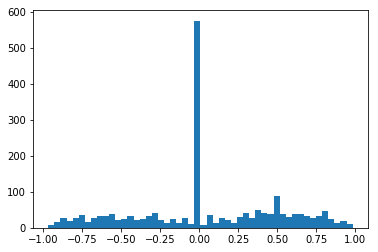

In [93]:
plt.hist(df_english['compound'],bins=50)
plt.show()